# Single-Sample Tests & Two-sample Tests


This lab / homework focuses on hypothesis tests in which you compare values from single samples to a target value and in which you compare two samples to each other. The tests you will work on today include: Z-test, One-sample t-test, and Independent Samples t-test. You will work with these concepts in this Notebook. 

## Assignment Goals

 - Develop familiarity with how to compare the means of single samples to target values and two independent samples to each other.
 - Understand the basic logic of how each test works, evaluate test assumptions, visualize relevant data, interpret results.

You will start by loading a dataset that will allow you to conduct a single-sample tests. 




#  
  
## Single-Sample Tests


Here, we will focus on single-sample tests, in which we compare data from a sample to a target value. The file name is 'auto-mpg.csv' (https://www.kaggle.com/datasets/uciml/autompg-dataset). This dataset records a number of fuel economy (in miles per gallon or 'mpg') and other statistics from popular car models sold in the US in the 1970s and early 1980s. The dataset contains the following variables:

- mpg: fuel economy performance in miles per gallon (how gas consumption is measured in the US; 1 gallon is about 3.8 litres).
- cylinders: this is a measure of engine strength/size (higher values indicate more power). A cylinder is a chamber where fuel combustion happens.
- displacement: the total volume of the cylinders swept up by the pistons in a single stroke (measured in cubic inches in this dataset); it is a measure of engine size.
- horsepower: a metric of the rate at which an engine produces power (1HP is the amount of power needed to move 550pounds 1 foot in 1 second).
- weight: car weight in pounds (1 pound = 454g, in case you were wondering how this compares to kg)
- acceleration: how many seconds it takes to get from a full stop to highway speed (55 miles per hour in those days)
- model_year: the last 2 digits of the year the car was made (cars were produced between 1970 and 1982)
- origin: categorical variable indicating the region in which the car is produced (1 = US; 2 = Europe; 3 = Asia)
- car_name: the make and model of the car

Start by loading the dataset ('auto-mpg.csv'). To ensure that the data loads when we ask it to, please make sure that your dataset is in the same folder as this Jupyter Notebook on your hard drive. 

To help promote understanding, please follow the standard multi-step hypothesis testing process. The process we will follow is:

 - Specify your hypotheses
 - Specify the probability of making a Type I Error that you are willing to accept
 - Determine the test statistic to compute, as well as the target value.
 - Summarize/visualize the relevant data
 - Plot the data
 - Conduct your hypothesis test
 - Interpret your result and describe it with reference to what your hypothesis means


#### Here is the first research question we will examine in this dataset:

##### Have fuel economy standards improved over time? 


In [1]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [2]:
# load the data

df = pd.read_csv('auto-mpg.csv')
print(df.head(),'\n')
print(f'There are {len(df)} cars in the dataset.')

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino   

There are 398 cars in the dataset.


Begin with a statement of the hypothesis.

**H0:** Fuel economy performance has not changed or has declined since the 1970s.

**H1:** Fuel economy performance (as we might hope) has improved since the 1970s.

**p-value:** We will use a p-value of .05

To answer test this idea, we will compare the average fuel economy of recent US cars to the cars in the dataset from the 1970s (& early 80s). Our comparison value will be 26mpg. Why this number? A recent article (December 2023) suggests that the average car sold in the US in 2022 had a fuel economy of 26 miles per gallon (https://www.ttnews.com/articles/us-carmakers-record-mileage). This is pretty similar to Canada (in 2021 the average Lge/100km in Canada was 8.8; https://www.iea.org/articles/fuel-economy-in-canada), which equates to about 27mpg (https://www.mpgtolitres.com/l-100km-to-mpg). 


Next, we need to determine whether to do the z-test or the t-test. If our comparison value is 26mpg, we do not have a standard deviation! That means even though we do have a reasonable sample size, we should probably use the t-test for this comparison. 

The average mpg for cars in the dataset is: 23.51 the sd = 7.82
The median mpg is: 23.00


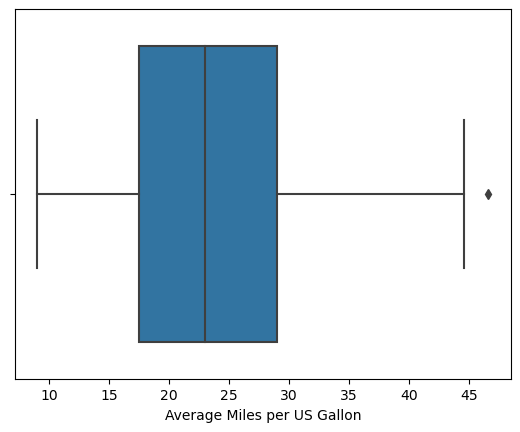

In [3]:
# Let's start with calculating the descriptive statistics and a boxplot of the data. 

avg_mpg = np.mean(df['mpg'])
sd_mpg = np.std(df['mpg'], ddof=1)
median_mpg = np.median(df['mpg'])

print(f'The average mpg for cars in the dataset is: {avg_mpg:.2f} the sd = {sd_mpg:.2f}')
print(f'The median mpg is: {median_mpg:.2f}')

# Boxplot
sns.boxplot(x = df['mpg'])
plt.xlabel('Average Miles per US Gallon')
plt.show()

It looks like we have an outlier in the dataset (with very good fuel efficiency). Let's find out what it is.

In [4]:
# print the value of the outlier and the name of the car associated with that value.

print(f'The best mileage value is {max(df["mpg"])} mpg.')
print(f'The car is a {df["car_name"].loc[df["mpg"] == max(df["mpg"])].values[0]}.')

The best mileage value is 46.6 mpg.
The car is a mazda glc.


Let's now plot the data as a histogram. Add lines for the mean and median (excluding the outliers).

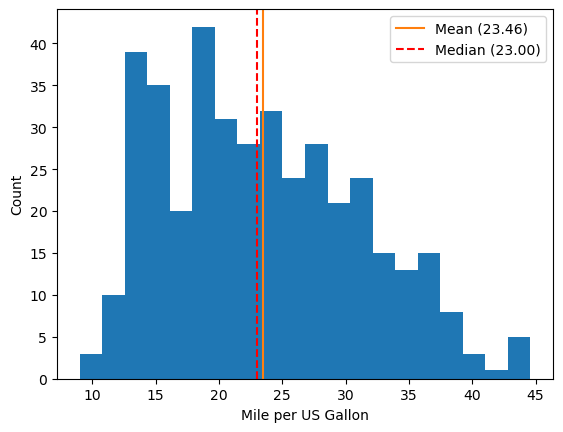

In [5]:
# Print the descriptive statistics with the outlier excluded
ave_mpg = np.mean(df['mpg'].loc[df['mpg'] < 46])
sd_mpg = np.std(df['mpg'].loc[df['mpg'] < 46], ddof=1)
med_mpg = np.median(df['mpg'].loc[df['mpg']< 46])

# Plot a histogram of the data with the outlier excluded
plt.hist(df['mpg'].loc[df['mpg'] < 46], bins=20)
plt.ylabel('Count')
plt.xlabel('Mile per US Gallon')
plt.axvline(np.mean(df['mpg'].loc[df['mpg'] < 46]), color='tab:orange', label=f'Mean ({ave_mpg:.2f})')
plt.axvline(np.median(df['mpg'].loc[df['mpg']< 46]), color='red', linestyle='dashed', label=f'Median ({med_mpg:.2f})')
plt.legend()
plt.show()


We have now removed the far outlier and although the data don't look quite normal we will proceed with our statistical test. 

In [6]:
# One-sample t-test (note that the test will infer the population SD from the sample sd):

# Define the comparison value first
comparison_value = 26

# Now conduct the test
tstat, pval = stats.ttest_1samp(a=df['mpg'].loc[df['mpg'] < 46], popmean=comparison_value)
print(f'Observed t-statistic: {tstat:.4f}; p-value: {pval:.10f}')

Observed t-statistic: -6.5486; p-value: 0.0000000002


The observed value of our t-statistic is -6.55, which corresponds to a p-value of <.001 (which is less than .05). That means the the average mpg in this sample of cars (23.46) is significantly lower than the comparison value of 26mpg (today's average). We can therefore reject H0 (there is not much change in car fuel efficiency) and instead can conclude that average fuel efficiency has improved over time (even if not by much). Let's find out how large this effect is by computing the effect size (Cohen's d). Here is a reminder of the formula:

$ d = (sample mean - comparison value) / sigma $

In [7]:
# Cohen's d

d = (ave_mpg - comparison_value) / sd_mpg
print(f"The effect size (Cohen's d) for this comparison is: {d:.4f}.")

The effect size (Cohen's d) for this comparison is: -0.3287.


So, although the comparison is statisitcally significant, this is a small to moderate effect. Effectively, the average mpg in this sample of cars is about .33 standard deviations below today's average. We will learn more about this later. 


### Z-test

For practice and so that we can compare the procedures, we will now conduct a Z-test. We will use a dataset from the Paris 2024 Olympics ('swim.csv'). The Canadian women swimmers did very well at the games. Here, we will look at the swim times from the final of the Women's 200 Metre Individual Medley (won by Canadian swimmer, Summer McIntosh). Spoiler alert: this year's winning times were substantially faster than the times for the same event in Tokyo (2020). The question we will ask here, is whether it is statistically significantly faster. In 2020, the average time for the top 16 swimmers in this event was 130.58 seconds (sd = .82 seconds). Here, we will treat the Tokyo times as the "population" for comparison purposes.

In [8]:
# load the data
swim = pd.read_csv('swim.csv')
print(swim.head(),'\n')
print(f'{len(swim)} swimmers completed the event with times reported.')

   Rank      Last   First Country   Time
0     1  McINTOSH  Summer     CAN  126.6
1     2  DOUGLASS    Kate     USA  126.9
2     3     WALSH    Alex     USA  127.5
3     4   McKEOWN  Kaylee     AUS  128.1
4     5        YU  Yiting     CHN  128.5 

33 swimmers completed the event with times reported.


Start with the usual hypothesis-testing steps:

**H0:** Times for the women's 200IM are similar for both Olympics (Tokyo & Paris).

**H1:** Times for the women's 200IM are different for both Olympics.

**p-value:** .05

**Test statistic:** Z-Test (comparison value: 130.58 seconds, sd=.82 seconds)

The Paris mean is 133.0879 and the standard deviation is: 4.1866


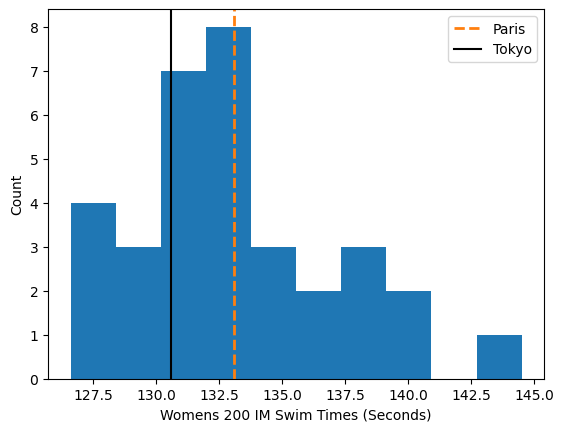

In [9]:
# Compute the mean and standard deviation. Plot the histogram (including lines that show the Paris and Toyko means).

tokyo_mean = 130.58
tokyo_sd = 0.82

paris_mean = np.mean(swim['Time'])
paris_sd = np.std(swim['Time'], ddof=1)

print(f'The Paris mean is {paris_mean:.4f} and the standard deviation is: {paris_sd:.4f}')

plt.hist(swim['Time'])
plt.axvline(paris_mean, color='tab:orange', linestyle='dashed', linewidth=2, label='Paris')
plt.axvline(tokyo_mean, color='black', label='Tokyo')
plt.ylabel('Count')
plt.xlabel('Womens 200 IM Swim Times (Seconds)')
plt.legend()
plt.show()

Wait a minute!! We said the times for Paris were FASTER than the times for Tokyo - but that's not what the graph shows (in fact, Summer McIntosh set an Olympic Record at these Games). What happened here? As a hint, think about how many scores were in the Tokyo group (if you don't remember, read the description above) and how many are in the Paris group. 

## <font color="blue"> *Homework Problem 1a*</font>

Re-calculate the mean and sd using the correct swim times. Replot your histogram to check your work.



The new mean with the top 16 Paris swimmers is 129.8250 and the new standard deviation is 1.8434.


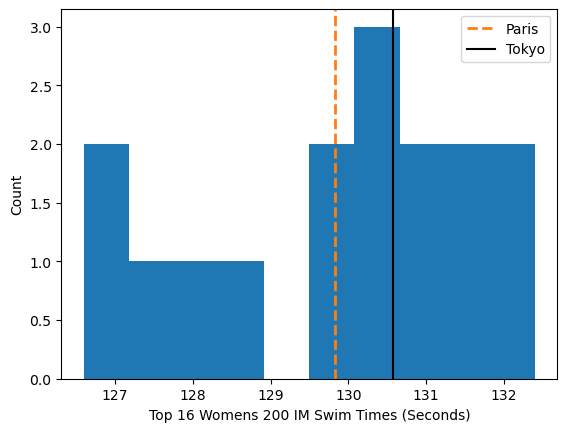

In [10]:
# Recalculate the mean and sd
paris_mean_new = np.mean(swim['Time'].loc[swim['Rank'] < 17])
paris_sd_new = np.std(swim['Time'].loc[swim['Rank'] < 17], ddof=1)
print(f'The new mean with the top 16 Paris swimmers is {paris_mean_new:.4f} and the new standard deviation is {paris_sd_new:.4f}.')

# Replot your histogram
plt.hist(swim['Time'].loc[swim['Rank'] < 17])
plt.axvline(paris_mean_new, color='tab:orange', linestyle='dashed', linewidth=2, label='Paris')
plt.axvline(tokyo_mean, color='black', label='Tokyo')
plt.ylabel('Count')
plt.xlabel('Top 16 Womens 200 IM Swim Times (Seconds)')
plt.legend()
plt.show()

## <font color="blue"> *Homework Problem 1b*</font>

Next, calculate your Z score. As a memory refresher, the Z-test formula is below. 

$ Z = (sample mean - comparison value) / (sigma / sqrt(n)) $

In [11]:
# Compute/print the Z
Z = (paris_mean_new - tokyo_mean)/(paris_sd_new/math.sqrt(16))
print(f'The Z score for the Paris swim times compared to the Tokyo swim times is {Z:.4f}.')

The Z score for the Paris swim times compared to the Tokyo swim times is -1.6383.


## <font color="blue"> *Homework Problem 1c*</font>

Calculate & print the effect size (Cohen's d) for this effect.


In [12]:
# Compute and print the Cohen's d here.
d_paris = (paris_mean_new - tokyo_mean)/paris_sd_new
print(f'The effect size (Cohens d) for the top 16 Paris swim times is {d_paris:.4f}.')
print(f'This is an effect size that would often be interpreted as "large." /nIt represents an improvement of 0.7550 seconds in speed.')

The effect size (Cohens d) for the top 16 Paris swim times is -0.4096.
This is an effect size that would often be interpreted as "large." /nIt represents an improvement of 0.7550 seconds in speed.


## <font color="blue"> *Homework Problem 1d*</font>

Now, you need to interpret the result. Is this is a statistically significant result? To figure that out, you need to know your critical value of Z. 

In the markdown cell below, state the statistical decision, including your critical value of Z for the test you did, and report what it means in language that someone who has never taken a statistics class could understand.

This result is statistically significant. The critical value of Z is +/-1.65, because the test is non-directional. As the observed value of Z is -1.6383, larger than -1.64, the hypothesis is null and the swimmers in the Paris Olympics were not significantly faster than the swimmers in the Tokyo Olympics. This is not "statistically significant" but a difference of 0.76 seconds is substantial for this kind of event.



#  




# Two Sample Tests

In this section of the lab, we will conduct a two-sample (or independent) t-test, two ways. We will re-visit the automotive dataset from above to do this and we will test the same hypothesis both with an empirical method (randomization) and the traditional theoretical/analytical method - a standard t-test. We will compare the results. Often these two methods produce similar results but this process should give you a feel for when they might be different.

The research question we will start with is whether cars produced in the US have **different** average fuel economy than those produced elsewhere. We will use the variable 'origin' to split the cars into domestic and imported. These will be our two groups. We will compare their MPG means. 

We will start with a check of the dataset, just in case something has changed.

In [13]:
# check to make sure your dataset is as you originally loaded it (reload if needed).

print(df.head(),'\n')
print(f'There are {len(df)} cars in the dataset.')

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino   

There are 398 cars in the dataset.


Standard hypothesis testing steps:

- H1: Imported cars will have different MPG than those produced in the US.
- H0: Imported cars will have similar MPG than those produced in the US.

p-value = .05

In [14]:
# Next, we will check the origin variable to see what values it takes (also in the dataset description).
print(f"Car origins : {np.unique(df['origin'])}")


# Because we know that there are 3 values, we need to recode these values into a new variable (so that 
# we end up with 2 groups, instead of 3).
# Start by adding a new variable "imported" to the dataset (we will set all values of this variable to 0).

df['imported'] = 0
print(f"Imported variable values before any changes: {np.unique(df['imported'])}")

# Then, we will change our new variable ('imported') to 1 if that car has an origin outside the US.

df.loc[df['origin'] > 1, 'imported'] = 1
print(f"Imported variable values after edits: {np.unique(df['imported'])}")

# print the first 20 rows of the header to see your change and whether it worked as you expected.
print(df.head(20))

Car origins : [1 2 3]
Imported variable values before any changes: [0]
Imported variable values after edits: [0 1]
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8         307.0         130    3504          12.0   
1   15.0          8         350.0         165    3693          11.5   
2   18.0          8         318.0         150    3436          11.0   
3   16.0          8         304.0         150    3433          12.0   
4   17.0          8         302.0         140    3449          10.5   
5   15.0          8         429.0         198    4341          10.0   
6   14.0          8         454.0         220    4354           9.0   
7   14.0          8         440.0         215    4312           8.5   
8   14.0          8         455.0         225    4425          10.0   
9   15.0          8         390.0         190    3850           8.5   
10  15.0          8         383.0         170    3563          10.0   
11  14.0          8         340.0

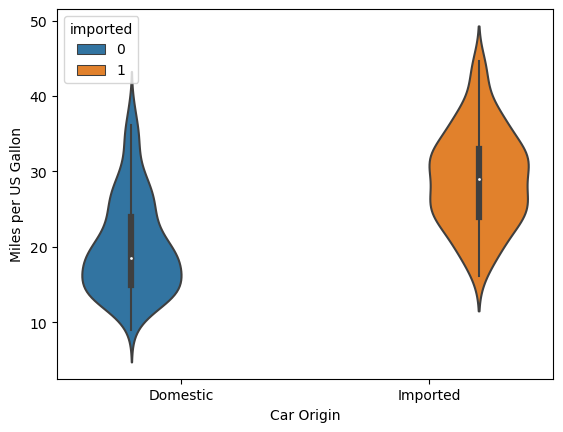

In [15]:
# Plot the mpg variable for both imported and non-imported cars - we will use a violin plot. 
# We already know that there is an MPG outlier in the dataset. We will exclude it before we plot.
# Be sure you label your plot appropriately.

sns.violinplot(x=df['imported'].loc[df['mpg'] < 46], y=df['mpg'].loc[df['mpg'] < 46], hue=df['imported'], palette='tab10', legend=False)
plt.xticks(ticks=[0,1], labels=['Domestic', 'Imported'])
plt.xlabel('Car Origin')
plt.ylabel('Miles per US Gallon')
plt.show()

This is interesting. It looks like there will be a very large difference in MPG between the domestic and imported cars. Let's check this with a traditional independent samples t-test. Before we do that, we should check that our descriptive statistics. 

In [16]:
# Descriptive statistics for mpg for the imported & domestic cars.

imported_mpg_mean = np.mean(df['mpg'].loc[(df['mpg'] < 46) & (df['imported'] == 1)])
imported_mpg_sd = np.std(df['mpg'].loc[(df['mpg'] < 46) & (df['imported'] == 1)], ddof=1)

domestic_mpg_mean = np.mean(df['mpg'].loc[(df['mpg'] < 46) & (df['imported'] == 0)])
domestic_mpg_sd = np.std(df['mpg'].loc[(df['mpg'] < 46) & (df['imported'] == 0)], ddof=1)

print(f'The imported cars have an average mpg of: {imported_mpg_mean:.4f}, sd = {imported_mpg_sd:.4f}.')
print(f'The domestic cars have an average mpg of: {domestic_mpg_mean:.4f}, sd = {domestic_mpg_sd:.4f}.')

The imported cars have an average mpg of: 29.1311, sd = 6.3634.
The domestic cars have an average mpg of: 20.0835, sd = 6.4029.


## <font color="blue"> *Homework Problem 2*</font>

Conduct an independent samples t-test (2-tailed, or non-directional) by using the indexing method demonstrated above to select the correct cases for each of your groups. Then then use scipy's stats independent t-test function to obtain your observed t-test and the associated p-value (based on the violin plots above, it will be substantially less than .05). Hint: the function can be called using 'stats.ttest_ind()'. If you want to learn more about this function, have a look in the docs (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). Be sure you interpret your results and explain what they mean using language that a person who has never taken a statistics class could understand. 

In [17]:
# Calculate your independent samples t-test and report the results

t_mpg, pvalmpg = stats.ttest_ind(df['mpg'].loc[(df['mpg'] < 46) & (df['imported'] == 0)], df['mpg'].loc[(df['mpg'] < 46) & (df['imported'] == 1)], equal_var=False)
print(f't-observed for the mpg comparison = {t_mpg:.4f} and the p-value is {pvalmpg}')

t-observed for the mpg comparison = -13.6669 and the p-value is 1.2893087140036137e-33


YOUR INTERPRETATION HERE:

The t-observed value for the miles per gallon comparison is -13.6669, which means that imported cars have a significantly higher mpg compared to domestic cars. This result is especially true for the 1970s/early 1980s. This is because the number is negative, meaning the first value, domestic, is lower than the second, imported. The p-value is very small, meaning this difference between domestic and imported car's mpg is very well supported and imported cars definitely have a higher average mpg compared to domestic cars. The p-value means that there is a big enough difference to claim the two kinds of cars, domestic and imported, have very different mpg.
 

Taken in the context of today's average fuel efficiency (26mpg), one might suspect that domestic cars have become somewhat more fuel efficient over time and the imported ones less so. Our next analysis might help us understand why.

One of the things that car drivers care about is car performance - for example, how much acceleration a car has. One might imagine that bigger engines (which use more gas) have more acceleration power. Plot acceleration now by import status and calculate the t-statistic (don't worry about the p-value). 

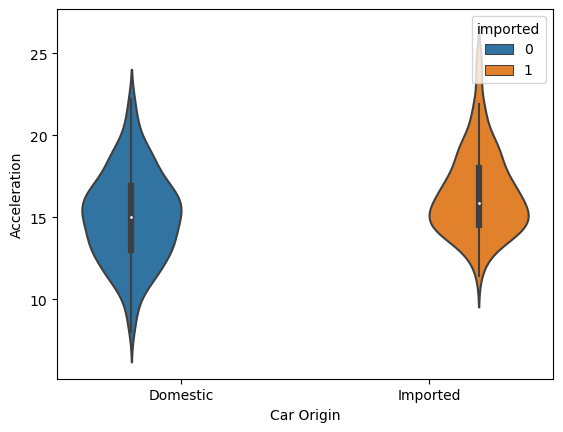

t-obeserved for the accceleration comparison = -5.2089


In [18]:
# Plot the acceleration variable for both imported and non-imported cars with a violin plot. 
# Be sure you label your plot appropriately.


sns.violinplot(x=df['imported'].loc[df['mpg'] < 46], y=df['acceleration'].loc[df['mpg'] < 46], hue=df['imported'], palette='tab10', legend=False)
plt.xticks(ticks=[0,1], labels=['Domestic', 'Imported'])
plt.xlabel('Car Origin')
plt.ylabel('Acceleration')
plt.show()

# Calcualte the t-statistic for this comparison. Name your variable 't_accel'

t_accel, pval = stats.ttest_ind(df['acceleration'].loc[(df['mpg'] < 46) & (df['imported'] == 0)], df['acceleration'].loc[(df['mpg'] < 46) & (df['imported'] == 1)], equal_var=False)
print(f't-obeserved for the accceleration comparison = {t_accel:.4f}')

The foreign cars look like they have worse performance here (higher numbers). Are the cars different in acceleration, depending on whether they are imported? We will use a randomization test to find out. Start with a randomization test function. We will make one that is flexible so we can look at any outcome variable in the dataset if we wish (you might need something like this for the next HW).

In [19]:
# Conduct your randomization test on acceleration

# Here is a function that will do this.
def my_t_distribution(data, num_iterations, y_var):
    distn_of_t = np.empty(num_iterations)
    for i in range(num_iterations):
        data['imported'] = np.random.permutation(data['imported'].values) # shuffles the data
        group1 = data.loc[data['imported'] == 0 , y_var].to_numpy() 
        group2 = data.loc[data['imported'] == 1, y_var].to_numpy() 
        tstat, pval = stats.ttest_ind(a=group1, b=group2, equal_var=False)
        distn_of_t[i] = tstat # save tstat to distribution
    return distn_of_t

# Call the function

d_of_t = my_t_distribution(df[df['mpg'] < 46].copy(), 1000, 'acceleration')

print(f'The mean of the sampling distribution of t is: {np.mean(d_of_t):.4f}.')
print(f'The standard deviation of the sampling distribution of t is: {np.std(d_of_t):.4f}.')

The mean of the sampling distribution of t is: -0.0088.
The standard deviation of the sampling distribution of t is: 1.0272.


The critical values of t are: -1.9525 and 2.0948.


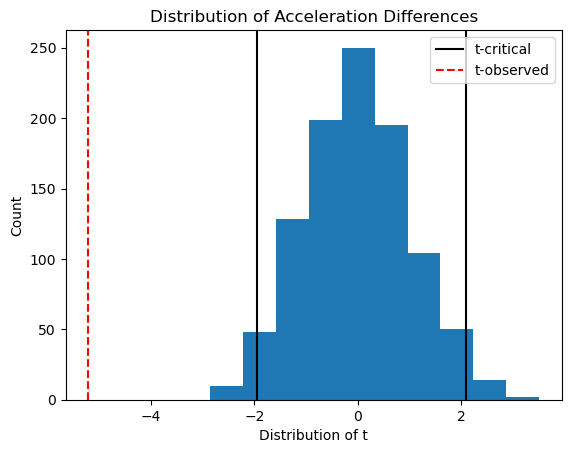

In [20]:
# Get t-critical values and plot distribution of t

tcrit_upper = np.percentile(d_of_t, 97.5)
tcrit_lower = np.percentile(d_of_t, 2.5)
print(f'The critical values of t are: {tcrit_lower:.4f} and {tcrit_upper:.4f}.')

plt.hist(d_of_t)
plt.title('Distribution of Acceleration Differences')
plt.ylabel('Count')
plt.xlabel('Distribution of t')
plt.axvline(tcrit_upper, color='black', label='t-critical')
plt.axvline(tcrit_lower, color='black')
plt.axvline(t_accel, color='red', linestyle='dashed', label='t-observed')
plt.legend()
plt.show()


## <font color="blue"> *Homework Problem 3a*</font>

It is pretty clear that the imports have slower acceleration. But this is likely to be a symptom of a different issue. Think back to the physics you had in high school - the fundamental laws that apply to the energy of objects at rest and at motion. The heavier the car, the larger its engine needs to be to get it moving. Larger engines burn more gasoline and therefore have lower fuel economy. In this dataset, the domestic cars are bigger, heavier and have much larger engines. This will be the real reason for the poor MPG on domestic cars. The fact that both domestic and foreign cars have been getting heavier in recent years is probably why, despite their more effecient engines, MPG hasn't improved much since the 1970s. The imported cars of the 70s were very small, light vehicles with little engines. It would not be unreasonable to expect that the domestic and foreign cars differ on all the relevant variables in the dataset. 

In the code cell below, repeat your t-test to find the variable that has the largest observed difference between the foreign and imported cars. You can program this in a loop if you wish - there is an example of how to do this in the HW2 (problem 2) solution. In the markdown cell below, explain your results.

In [21]:
# Recalculate the t-test using each of the relevant variables.

t_hp, pval1 = stats.ttest_ind(df['horsepower'].loc[(df['mpg'] < 46) & (df['imported'] == 0)], df['horsepower'].loc[(df['mpg'] < 46) & (df['imported'] == 1)], equal_var=False)
print(f't-observed for the horsepower comparison = {t_hp:.4f}')

t_weight, pval2 = stats.ttest_ind(df['weight'].loc[(df['mpg'] < 46) & (df['imported'] == 0)], df['weight'].loc[(df['mpg'] < 46) & (df['imported'] == 1)], equal_var=False)
print(f't-observed for the weight comparison = {t_weight:.4f}')

t_displacement, pval3 = stats.ttest_ind(df['displacement'].loc[(df['mpg'] < 46) & (df['imported'] == 0)], df['displacement'].loc[(df['mpg'] < 46) & (df['imported'] == 1)], equal_var=False)
print(f't-observed for the displacement comparison = {t_displacement:.4f}')

t_cylinders, pval4 = stats.ttest_ind(df['cylinders'].loc[(df['mpg'] < 46) & (df['imported'] == 0)], df['cylinders'].loc[(df['mpg'] < 46) & (df['imported'] == 1)], equal_var=False)
print(f't-observed for the cylinder comparison = {t_cylinders:.4f}')

t-observed for the horsepower comparison = 12.9689
t-observed for the weight comparison = 17.0900
t-observed for the displacement comparison = 21.4665
t-observed for the cylinder comparison = 18.5040


All of the t-values for horsepower, weight, displacement, and cylinders are very high positive numbers. This means that there is a very large difference between imported and domestic vehicles in each of these categories. This further means that domestic cars have significantly higher values in each of the above. They have more horsepower, higher weight, more displacement, and more cylinders. Displacement has the highest t-value, which means domestic and import cars are the most different in this category. Horsepower has the lowest t-value, which means domestic and import cars are the least different out of these categories. Overall, this means that there are more factors influencing miles per gallon, especially with regards to domestic cars. The significantly higher weight that domestic cars have, as demonstrated by the high positive t-value, is part of the reason miles per gallon is lower in domestic cars. The other aspects of the cars, such as horsepower, displacement, and cylinders, also plays a part in the discrepancies in miles per gallon. 


 

## <font color="blue"> *Homework Problem 3b*</font>

Last homework (HW4) you learned about correlations between variables. In the final section of HW5, we will put these ideas together with a visualization. Again, using the HW4 solution (problem 2) as an example, make a visualization of the correlation between each of the metrics you examined above and how it relates to a car's mpg.

Once you get your visualization working (the "PairGrid" plot), add the argument "hue='imported'" to the plot (this will cause it to print the data in different colours for the domestic and imported cars; this gallery plot shows an example: https://seaborn.pydata.org/examples/scatter_bubbles.html). It is a nice way to see the differences between the car types for each variable. If you wish, you can also print the correlation for each variable (use a loop for ease).

Finally, use the markdown cell below to interpret the data by providing a "take home" point to a reader who has never taken a course in statistics.

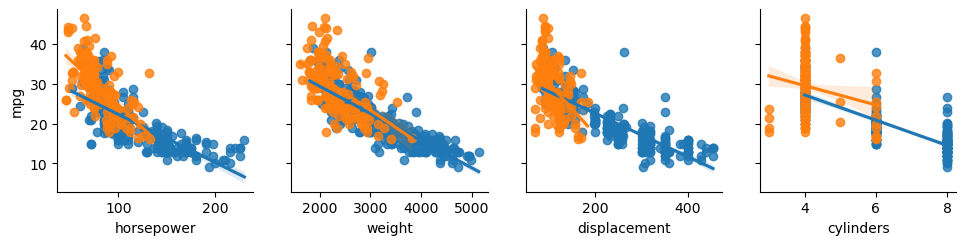

r(horsepower, mpg) = -0.7783, p = 7.438049903562432e-82
r(weight, mpg) = -0.8345, p = 2.801007059438872e-104
r(displacement, mpg) = -0.8065, p = 3.4095643532760435e-92
r(cylinders, mpg) = -0.7783, p = 7.233448219731584e-82


In [22]:
# Produce your plot (and print the correlation between the variables if you decide to do that).

tested_vars = ['horsepower', 'weight', 'displacement','cylinders']

g = sns.PairGrid(data=df, y_vars='mpg', x_vars=tested_vars, hue='imported')
g.map(sns.regplot)

plt.show()

for i in range(len(tested_vars)):
    r, p = stats.pearsonr(df[tested_vars[i]].loc[df['mpg'] < 46], df['mpg'].loc[df['mpg'] < 46])
    print(f'r({tested_vars[i]}, mpg) = {r:.4f}, p = {p}')

What do the data mean? YOUR RESPONSE HERE:

The horsepower plot is about the ways miles per gallon and horsepower interact. It shows that the more horsepower a car has, the less mpg. This is most likely due to the high volume of gas needed to sustain high horsepower cars. It shows that imported cars tend to have less horsepower, but higher mpg. It also shows that domestic cars can have high or low horsepower. There are a few exceptions to this, but they are not as common.
The weight plot shows that the more a car weighs, the lower its mpg. It also shows that imported cars tend to have lower weights and higher mpg. It shows that domestic cars can be very light or very heavy. There are a few cars that weigh more but have higher mpg than expected, but they are rare.
The displacement plot shows that the higher the displacement, the less mpg. It also shows that imported cars tend to have displacements below 200, while domestic cars have displacements from around 50 to 450. There are a few cars that have higher displacement and higher miles per gallon, but they are not as common.
Finally, the cylinder plot shows that when there are less cylinders, they tend to have higher mpg. It shows that imported cars rarely have more than 6 cylinders, but domestic cars can have 4 to 8 cylinders. It also shows that a few cars have few cylinders and low mpg, but they are rare, same with cars that have many cylinders and high mpg, they are also very rare.